# Practical Machine Learning and Deep Learning - Assignment 1 - Text De-toxification

## Task description

Text Detoxification Task is a process of transforming the text with toxic style into the text with the same meaning but with neutral style.

> Formal definition of text detoxification task can be found in [Text Detoxification using Large Pre-trained Neural Models by Dale et al., page 14](https://arxiv.org/abs/2109.08914)

Your assignment is to create a solution for detoxing text with high level of toxicity. It can be a model or set of models, or any algorithm that would work.

## Data Labeling

Level of Toxicity is labeled with annotating binary classification by people. Text is passed to annotators for them to put specific label toxic/non-toxic. Then number of positive / toxic assesments are divided by the total number of annotators. This process is performed for every entry in the data, resulting in toxicity dataset.

By this process, we have text with toxicity level. However, for training the model it is best to have sample with high toxicity level and its paraphrazed version with low toxicity level. This gives an opportunity for the model to distiguish from the overall meaning of the text and concentrate on decreasing the level of toxicity (dirung the training process). That is why the data that is provided for you has the pair structure. Dataset structure is described in next section.

## Data Description

The dataset is a subset of the ParaNMT corpus (50M sentence pairs). The filtered ParaNMT-detox corpus (500K sentence pairs) can be downloaded from [here](https://github.com/skoltech-nlp/detox/releases/download/emnlp2021/filtered_paranmt.zip). This is the main dataset for the assignment detoxification task.

The data is given in the `.tsv` format, means columns are separated by `\t` symbol.

| Column | Type | Discription |
| ----- | ------- | ---------- |
| reference | str | First item from the pair |
| ref_tox | float | toxicity level of reference text |
| translation | str | Second item from the pair - paraphrazed version of the reference|
| trn_tox | float | toxicity level of translation text |
| similarity | float | cosine similarity of the texts |
| lenght_diff | float | relative length difference between texts |

## Evaluation criterias

This assignment is on creating the solution, not on evaluating your algorithm. Major part of the grade will be dedicated to the structure of the solution, your development choices and your explonation on how you approached the problem.

Submission should be a link to GitHub repository. It should be open repository, so that the course team could assess it easily.

The structure of the repository should has the following structure:

```
text-detoxification
├── README.md # The top-level README
│
├── data
│   ├── external # Data from third party sources
│   ├── interim  # Intermediate data that has been transformed.
│   └── raw      # The original, immutable data
│
├── models       # Trained and serialized models, final checkpoints
│
├── notebooks    #  Jupyter notebooks. Naming convention is a number (for ordering),
│                   and a short delimited description, e.g.
│                   "1.0-initial-data-exporation.ipynb"            
│
├── references   # Data dictionaries, manuals, and all other explanatory materials.
│
├── reports      # Generated analysis as HTML, PDF, LaTeX, etc.
│   └── figures  # Generated graphics and figures to be used in reporting
│
├── requirements.txt # The requirements file for reproducing the analysis environment, e.g.
│                      generated with pip freeze › requirements. txt'
└── src                 # Source code for use in this assignment
    │                 
    ├── data            # Scripts to download or generate data
    │   └── make_dataset.py
    │
    ├── models          # Scripts to train models and then use trained models to make predictions
    │   ├── predict_model.py
    │   └── train_model.py
    │   
    └── visualization   # Scripts to create exploratory and results oriented visualizations
        └── visualize.py
```


In the top `README.md` file put your name, email and group number. Additionaly, put basic commands how to use your repository. How to transform data, train model and make a predictions.

In the `reports` directory create at least two report about your work. In the **first report**, describe your path in solution creation process. List any architectures, ideas, problems and data that leads to your final solution. In the **second report**, describe your final solution.

In the `notebooks` directory put at least two notebooks. **First notebook** should contain your initial data exploration and basic ideas behind data preprocessing. **Second notebook** should contain information about final solution training and visualization.

In the `src` directory you should put all the code that is used for the final solution. Provide the script for creation intermediate data in `src/data/`. Provide `train` and `prediction` scripts in `src/models`. Provide visualization script in `src/visualization/`.

## Grading criterias

Full assignment without any problems is said to be the `100%` solution.

| Criteria | Weight (%) | Comment |
| ---- | ----- | ----- |
| Structure and code quality | 25 | Code quality, structure, comments, clean repo, commit history, reproducibility (manual seeding) |
| Visualization, notebooks quality | 10 | Jupyter notebooks, visualizations |
| Solution building | 40 |  Solution exploration, references, ideas decription, final report structure |
| Final score, evaluation  | 15 | Evaluation function, final score, quality of results |
| Usability, documentation | 10 | Docstrings, arguments parsing, README |

If **PMLDL Course Team** will have any questions about your assignment or your work fails to show your results you will be called solution defence procedure.

## Report Examples
### Solution Bulding Report Example

```
# Baseline: Dictionary based
...
# Hypothesis 1: Custom embeddings
...
# Hypothesis 2: More rnn layers
...
# Hypothesis 3: Pretrained embeddings
...
# Results
...
```

### Final Solution Report Example

```
# Introduction
...
# Data analysis
...
# Model Specification
...
# Training Process
...
# Evaluation
...
# Results
...
```

**Good luck! Have fun!**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Add other libraries as needed

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PMLDL_Text_Detoxification/data/raw/filtered.tsv', sep='\t')
df = df.drop(columns=['Unnamed: 0'])
df

,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348
...,...,...,...,...,...,...
577772,You didn't know that Estelle had stolen some f...,you didn't know that Estelle stole your fish f...,0.870322,0.030769,0.000121,0.949143
577773,It'il suck the life out of you!,you'd be sucked out of your life!,0.722897,0.058824,0.996124,0.215794
577774,"I can't fuckin' take that, bruv.",I really can't take this.,0.617511,0.212121,0.984538,0.000049
577775,They called me a fucking hero. The truth is I ...,"they said I was a hero, but I didn't care.",0.679613,0.358209,0.991945,0.000124


from matplotlib import pyplot as plt
df['similarity'].plot(kind='hist', bins=20, title='similarity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['lenght_diff'].plot(kind='hist', bins=20, title='lenght_diff')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['ref_tox'].plot(kind='hist', bins=20, title='ref_tox')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['trn_tox'].plot(kind='hist', bins=20, title='trn_tox')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='similarity', y='lenght_diff', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='lenght_diff', y='ref_tox', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='ref_tox', y='trn_tox', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['similarity'].plot(kind='line', figsize=(8, 4), title='similarity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['lenght_diff'].plot(kind='line', figsize=(8, 4), title='lenght_diff')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['ref_tox'].plot(kind='line', figsize=(8, 4), title='ref_tox')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['trn_tox'].plot(kind='line', figsize=(8, 4), title='trn_tox')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.head()

,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577777 entries, 0 to 577776
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   reference    577777 non-null  object 
 1   translation  577777 non-null  object 
 2   similarity   577777 non-null  float64
 3   lenght_diff  577777 non-null  float64
 4   ref_tox      577777 non-null  float64
 5   trn_tox      577777 non-null  float64
dtypes: float64(4), object(2)
memory usage: 26.4+ MB


In [ ]:
df.describe()

,similarity,lenght_diff,ref_tox,trn_tox
count,577777.000000,577777.000000,577777.000000,577777.000000
mean,0.758469,0.157652,0.541372,0.434490
std,0.092695,0.108057,0.457571,0.458904
min,0.600001,0.000000,0.000033,0.000033
25%,0.681105,0.066667,0.012171,0.000707
50%,0.754439,0.141791,0.806795,0.085133
75%,0.831244,0.238095,0.990469,0.973739
max,0.950000,0.400000,0.999724,0.999730


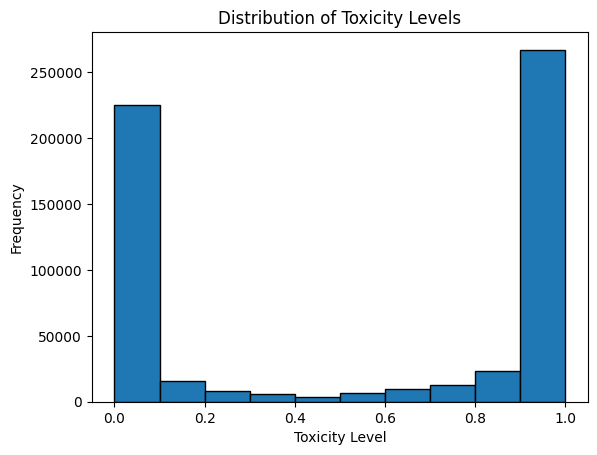

In [ ]:
# Example: To visualize toxicity distributions
plt.hist(df['ref_tox'], bins=10, edgecolor='k')
plt.xlabel('Toxicity Level')
plt.ylabel('Frequency')
plt.title('Distribution of Toxicity Levels')
plt.show()

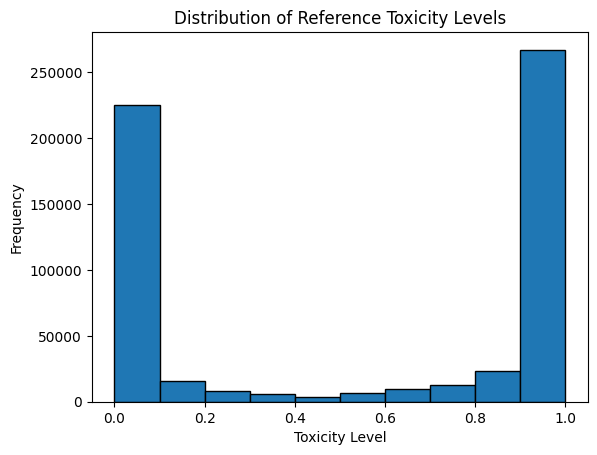

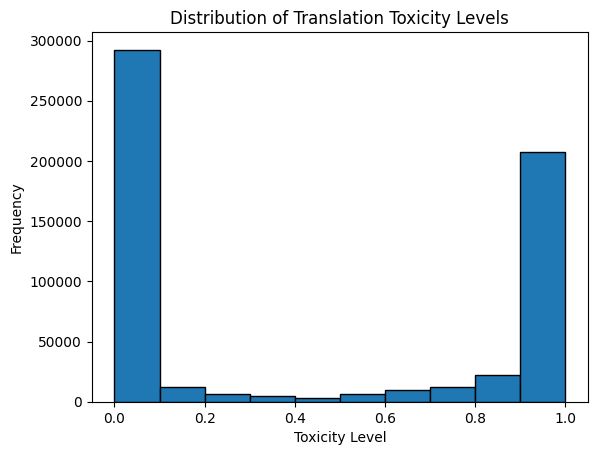

In [ ]:
import matplotlib.pyplot as plt

# Plotting the distribution of reference toxicity
plt.hist(df['ref_tox'], bins=10, edgecolor='k')
plt.xlabel('Toxicity Level')
plt.ylabel('Frequency')
plt.title('Distribution of Reference Toxicity Levels')
plt.show()

# Plotting the distribution of translation toxicity
plt.hist(df['trn_tox'], bins=10, edgecolor='k')
plt.xlabel('Toxicity Level')
plt.ylabel('Frequency')
plt.title('Distribution of Translation Toxicity Levels')
plt.show()


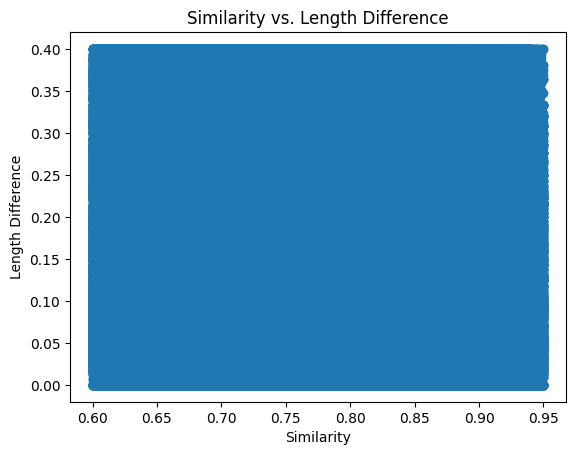

In [ ]:
# Scatter plot for similarity vs. length difference
plt.scatter(df['similarity'], df['lenght_diff'])
plt.xlabel('Similarity')
plt.ylabel('Length Difference')
plt.title('Similarity vs. Length Difference')
plt.show()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PMLDL_Text_Detoxification/data/raw/filtered.tsv', sep='\t')
df = df.drop(columns=['Unnamed: 0'])
df.head(1)

,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
